In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [4]:
df = pd.read_csv("/Users/seungwooseo/Library/Mobile Documents/com~apple~CloudDocs/Github/Machine_Learning_study/drug200.csv")

### EDA

In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: xlabel='Drug', ylabel='count'>

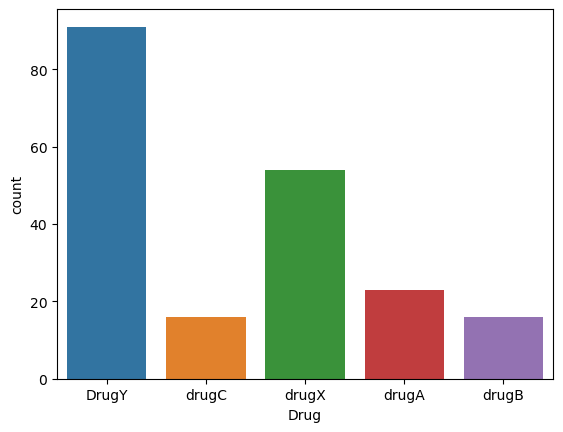

In [9]:
#Check the bias of dependent variable
sns.countplot(x=df['Drug'])

### Data Preprocessing

In [10]:
scaler = StandardScaler()

In [11]:
encoder = OneHotEncoder()

#### Divide the whole dataset into two types

In [12]:
# Sex, BP, and Cholesterol are categorical variables
X_categorical = df[['Sex','BP','Cholesterol']]

In [14]:
X_categorical = encoder.fit_transform(X_categorical)

In [18]:
print(X_categorical.toarray())

[[1. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]]


In [19]:
# 'Age' and 'Na_to_K' variables are numerical variables
X_numerical = df[['Age','Na_to_K']]

In [22]:
X_numerical = scaler.fit_transform(X_numerical)

In [23]:
X_numerical

array([[-1.29159102,  1.28652212],
       [ 0.16269866, -0.4151454 ],
       [ 0.16269866, -0.82855818],
       [-0.988614  , -1.14996267],
       [ 1.0110343 ,  0.27179427],
       [-1.35218642, -1.03769314],
       [ 0.28388946,  0.02643885],
       [-0.20087376, -0.70046821],
       [ 0.9504389 , -0.12676951],
       [-0.07968296,  0.45567206],
       [ 0.16269866, -0.59916196],
       [-0.62504158,  0.43221897],
       [-0.07968296, -0.09832049],
       [ 1.79877454,  0.674105  ],
       [ 0.34448487, -0.46926791],
       [-1.71575884, -0.0788919 ],
       [ 1.49579753, -0.64245998],
       [-0.07968296, -0.29316156],
       [-1.29159102, -1.21935052],
       [-0.74623239,  1.37242427],
       [ 0.76865269,  0.42236589],
       [ 1.13222511,  1.36451406],
       [ 0.16269866,  2.00995979],
       [ 0.22329406, -0.14550423],
       [-0.68563699,  2.41490725],
       [-0.988614  ,  0.37809645],
       [-0.80682779,  1.9819271 ],
       [ 0.28388946, -0.93028076],
       [-0.32206457,

In [26]:
X = np.hstack((X_categorical.toarray(),X_numerical))
X.shape

(200, 9)

In [31]:
# Categorize the Drug type
y = df['Drug']

### Support Vecotr Machine

In [27]:
svm = svm.SVC()

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
from sklearn.model_selection import KFold

In [30]:
# 8 Fold Cross Validation
kf = KFold(n_splits=8)

In [32]:
accuracy = []
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx] #Dependent variable is the dataframe format, and need iloc.
    
    svm.fit(X_train, y_train)
    predictions = svm.predict(X_test)
    
    accuracy_tmp = accuracy_score(y_test, predictions)
    accuracy.append(accuracy_tmp)

In [34]:
# The mean of KFolded Support Vector Machine
np.mean(accuracy)

0.97